In [3]:
from google.colab import files
uploaded = files.upload()

Saving fruits-360_dataset_100x100.zip to fruits-360_dataset_100x100.zip


In [4]:
import zipfile
import os

# Specify the file path of the zip file
zip_path = '/content/fruits-360_dataset_100x100.zip'
extract_folder = 'fruits-360_dataset_100x100/'

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Dataset extracted to {extract_folder}")

Dataset extracted to fruits-360_dataset_100x100/


In [5]:
# Importation des bibliothèques nécessaires
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

# Initialisation des paramètres du modèle
num_classes = 141  # Nombre de classes à classifier (141 fruits différents)
img_rows, img_cols = 32, 32  # Dimensions des images d'entrée (32x32 pixels)
batch_size = 16  # Taille du lot pour l'entraînement

# Répertoires contenant les images d'entraînement et de validation
train_data_dir = '/content/fruits-360_dataset_100x100/fruits-360/Training'
validation_data_dir = '/content/fruits-360_dataset_100x100/fruits-360/Test'

# Création des générateurs de données avec augmentation pour l'entraînement
train_datagen = ImageDataGenerator(
      rescale=1./255,  # Normalisation des pixels (valeurs entre 0 et 1)
      rotation_range=30,  # Rotation aléatoire des images jusqu'à 30 degrés
      width_shift_range=0.3,  # Déplacement horizontal aléatoire
      height_shift_range=0.3,  # Déplacement vertical aléatoire
      horizontal_flip=True,  # Retour horizontal aléatoire
      fill_mode='nearest')  # Remplir les pixels vides après transformation

# Générateur de validation sans augmentation, juste normalisation
validation_datagen = ImageDataGenerator(rescale=1./255)

# Chargement des images d'entraînement avec les paramètres définis
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),  # Redimensionner les images à 32x32
        batch_size=batch_size,  # Taille des lots
        class_mode='categorical',  # Classification multi-classes
        shuffle=True)  # Mélanger les données d'entraînement

# Chargement des images de validation avec les mêmes paramètres (sans augmentation)
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)  # Pas de mélange des données de validation


Found 70491 images belonging to 141 classes.
Found 23619 images belonging to 141 classes.


In [6]:
# Définition du modèle de réseau de neurones convolutionnel (CNN)
model = Sequential()

# Première couche convolutionnelle avec padding 'same' pour maintenir la taille
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_rows, img_cols, 3)))  # 3 canaux (RGB)
model.add(Activation('relu'))  # Fonction d'activation ReLU pour la non-linéarité
model.add(Conv2D(32, (3, 3)))  # Deuxième couche convolutionnelle
model.add(Activation('relu'))  # ReLU
model.add(MaxPooling2D(pool_size=(2, 2)))  # Pooling pour réduire la taille de l'image
model.add(Dropout(0.25))  # Dropout pour éviter le sur-apprentissage (dropout de 25%)

# Deuxième bloc de convolution
model.add(Conv2D(64, (3, 3), padding='same'))  # Augmenter le nombre de filtres
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Pooling à nouveau
model.add(Dropout(0.25))  # Dropout pour ce bloc aussi

# Applatir les données pour la couche dense suivante
model.add(Flatten())

# Couche dense avec 512 neurones
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Dropout plus élevé (50%)

# Couche de sortie avec une activation softmax pour la classification multi-classes
model.add(Dense(num_classes))
model.add(Activation('softmax'))  # Softmax pour obtenir des probabilités sur les classes

# Affichage du résumé du modèle pour voir sa structure
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 141)                 │          72,333 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 141)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,318,061 (5.03 MB)

 Trainable params: 1,318,061 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
# Importation de l'optimiseur RMSprop et des callbacks pour l'entraînement
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Callback pour sauvegarder le meilleur modèle basé sur la perte de validation
checkpoint = ModelCheckpoint("fruits_cnn.keras",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

# Callback pour arrêter l'entraînement lorsque la perte de validation ne s'améliore plus
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,  # Arrêt après 3 epochs sans amélioration
                          verbose=1,
                          restore_best_weights=True)

# Callback pour réduire le taux d'apprentissage quand la perte de validation se stabilise
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                               factor=0.2,  # Diviser le taux d'apprentissage par 5
                               patience=3,  # Attendre 3 epochs sans amélioration
                               verbose=1,
                               min_delta=0.0001)

# Liste de tous les callbacks à utiliser pendant l'entraînement
callbacks = [earlystop, checkpoint, reduce_lr]

# Compilation du modèle avec l'optimiseur RMSprop et la fonction de perte adaptée à la classification multi-classes
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),  # Appliquer un taux d'apprentissage de 0.001
              metrics=['accuracy'])

# Paramètres d'entraînement
nb_train_samples = 41322  # Nombre d'images d'entraînement
nb_validation_samples = 13877  # Nombre d'images de validation
epochs = 10  # Nombre d'époques pour l'entraînement

# Entraînement du modèle avec les générateurs et les callbacks définis
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2582/2582 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.1288 - loss: 3.6679
Epoch 1: val_loss improved from inf to 1.09400, saving model to fruits_cnn.keras
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 284s 109ms/step - accuracy: 0.1288 - loss: 3.6675 - val_accuracy: 0.6757 - val_loss: 1.0940 - learning_rate: 0.0010
Epoch 2/10
1824/2582 ━━━━━━━━━━━━━━━━━━━━ 1:14 99ms/step - accuracy: 0.5869 - loss: 1.3166

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 1.09400 to 0.71419, saving model to fruits_cnn.keras
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 196s 76ms/step - accuracy: 0.5989 - loss: 1.2783 - val_accuracy: 0.7511 - val_loss: 0.7142 - learning_rate: 0.0010
Epoch 3/10
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.7185 - loss: 0.8938
Epoch 3: val_loss did not improve from 0.71419
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 299s 107ms/step - accuracy: 0.7186 - loss: 0.8937 - val_accuracy: 0.6905 - val_loss: 1.1412 - learning_rate: 0.0010
Epoch 4/10
1824/2582 ━━━━━━━━━━━━━━━━━━━━ 1:14 98ms/step - accuracy: 0.7837 - loss: 0.6911
Epoch 4: val_loss improved from 0.71419 to 0.49941, saving model to fruits_cnn.keras
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 239s 93ms/step - accuracy: 0.7864 - loss: 0.6858 - val_accuracy: 0.8702 - val_loss: 0.4994 - learning_rate: 0.0010
Epoch 5/10
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.8228 - loss: 0.5933
Epoch 5: val_loss improved from 0.49941 to 0.47375, saving model to fruits

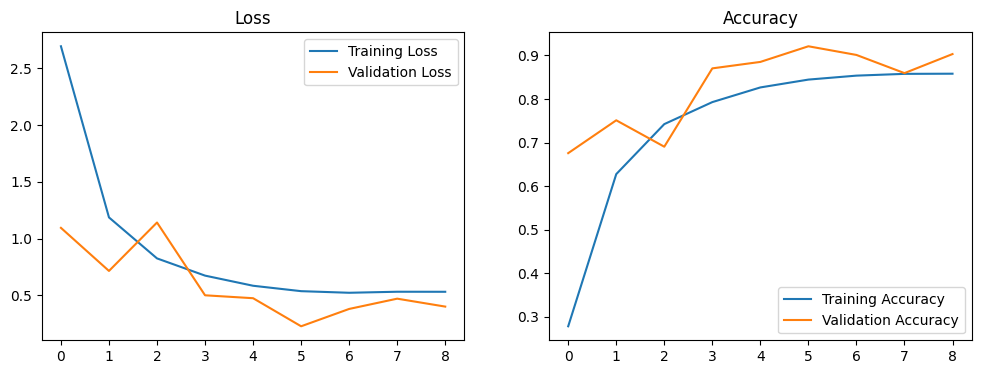

In [8]:
# Affichage des courbes de perte et de précision pendant l'entraînement
import matplotlib.pyplot as plt

# Tracer les courbes de perte d'entraînement et de validation
plt.figure(figsize=(12, 4))

# Tracer la perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

# Tracer la précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

In [9]:
# Importation des fonctions nécessaires depuis la bibliothèque scikit-learn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Calcul du nombre correct de steps pour les données de validation
# Le nombre de steps correspond au nombre de batches à traiter pour valider toutes les données
validation_steps = validation_generator.samples // validation_generator.batch_size

# Prédiction des sorties pour les données de validation
# La méthode 'predict' génère les prédictions pour l'ensemble des données de validation en fonction des steps calculés
Y_pred = model.predict(validation_generator, steps=validation_steps, verbose=1)

# Conversion des prédictions en indices de classes (utilisation de np.argmax pour obtenir l'index de la classe avec la probabilité la plus élevée)
y_pred = np.argmax(Y_pred, axis=1)

# Matrice de confusion
print('Confusion Matrix')  # Affiche l'intitulé de la matrice de confusion
# Création de la matrice de confusion en comparant les vraies classes et les prédictions
conf_matrix = confusion_matrix(validation_generator.classes[:len(y_pred)], y_pred)
print(conf_matrix)  # Affiche la matrice de confusion calculée

# Rapport de classification
print('Classification Report')  # Affiche l'intitulé du rapport de classification
# Création et affichage du rapport de classification en utilisant les vraies classes et les prédictions
# Les labels des classes sont extraits du générateur de validation
class_labels = list(validation_generator.class_indices.keys())
print(classification_report(validation_generator.classes[:len(y_pred)], y_pred, target_names=class_labels))


1476/1476 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step
Confusion Matrix
[[142   0   0 ...   0   0   0]
 [  0 164   0 ...   0   0   0]
 [  0   0  67 ...   0   0   0]
 ...
 [  0   0   0 ... 157   0   0]
 [  0   0   0 ...   0  64   0]
 [  0   0   0 ...   0   0  77]]
Classification Report
                       precision    recall  f1-score   support

              Apple 6       0.78      0.90      0.84       157
     Apple Braeburn 1       0.55      1.00      0.71       164
 Apple Crimson Snow 1       1.00      0.45      0.62       148
       Apple Golden 1       0.90      0.99      0.94       160
       Apple Golden 2       1.00      0.71      0.83       164
       Apple Golden 3       0.71      0.76      0.73       161
 Apple Granny Smith 1       0.82      1.00      0.90       164
    Apple Pink Lady 1       0.75      1.00      0.86       152
          Apple Red 1       0.80      1.00      0.89       164
          Apple Red 2       1.00      0.88      0.94       164
          Apple Red 3       1.

868/868 ━━━━━━━━━━━━━━━━━━━━ 35s 39ms/step


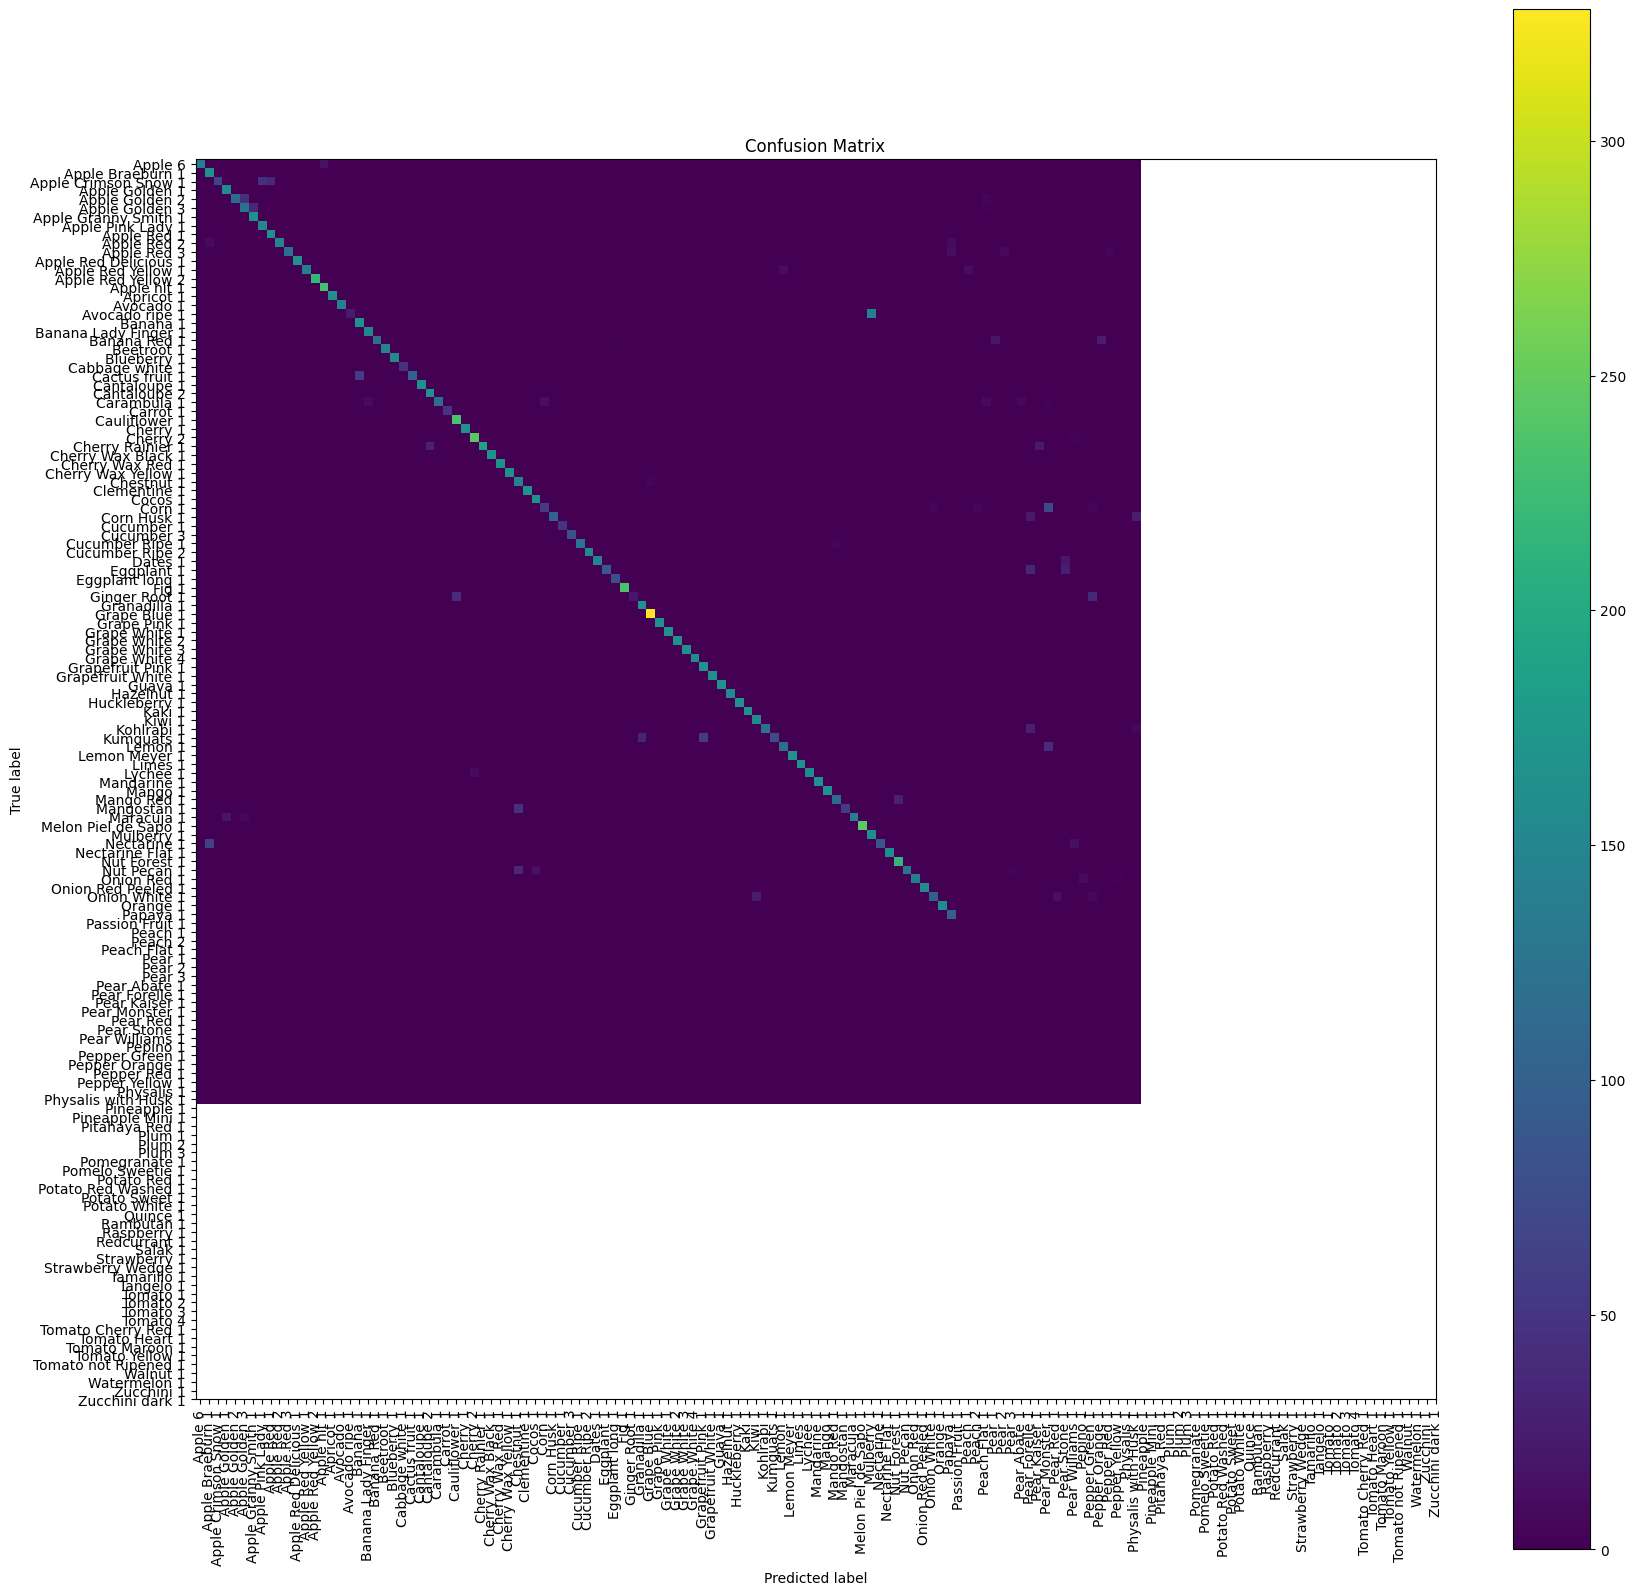

                       precision    recall  f1-score   support

              Apple 6       0.99      0.90      0.94       157
     Apple Braeburn 1       0.69      1.00      0.82       164
 Apple Crimson Snow 1       1.00      0.45      0.62       148
       Apple Golden 1       0.90      0.99      0.94       160
       Apple Golden 2       1.00      0.71      0.83       164
       Apple Golden 3       0.71      0.76      0.73       161
 Apple Granny Smith 1       0.82      1.00      0.90       164
    Apple Pink Lady 1       0.78      1.00      0.87       152
          Apple Red 1       0.82      1.00      0.90       164
          Apple Red 2       1.00      0.88      0.94       164
          Apple Red 3       1.00      0.83      0.91       144
Apple Red Delicious 1       1.00      1.00      1.00       166
   Apple Red Yellow 1       1.00      0.87      0.93       164
   Apple Red Yellow 2       1.00      1.00      1.00       219
          Apple hit 1       0.94      0.99      0.96  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
# Importation des bibliothèques nécessaires pour les graphiques et les métriques
import matplotlib.pyplot as plt  # Pour afficher la matrice de confusion
from sklearn.metrics import classification_report, confusion_matrix  # Pour générer la matrice de confusion et le rapport de classification
from keras.models import load_model  # Pour charger le modèle pré-entrainé
import numpy as np  # Pour les calculs numériques

# Définition des dimensions de l'image (taille des images d'entrée)
img_row, img_height, img_depth = 32, 32, 3  # Images de 32x32 pixels avec 3 canaux de couleur (RGB)

# Chargement du modèle pré-entrainé à partir du fichier .keras
model = load_model('/content/fruits_cnn.keras')  # Remplacez le chemin par celui de votre modèle

# Récupération des classes à partir du générateur de validation
class_labels = validation_generator.class_indices  # Contient les indices des classes
class_labels = {v: k for k, v in class_labels.items()}  # Inversion des indices pour associer l'index à l'étiquette de classe
classes = list(class_labels.values())  # Liste des noms de classe

# Définition du nombre d'échantillons dans les ensembles d'entraînement et de validation
nb_train_samples = 41322  # Nombre d'échantillons dans l'ensemble d'entraînement
nb_validation_samples = 13877  # Nombre d'échantillons dans l'ensemble de validation
batch_size = 16  # Taille du batch (doit correspondre à celle utilisée dans le générateur)

# Calcul des prédictions du modèle sur les données de validation
# Utilisation de model.predict() au lieu de predict_generator pour obtenir les prédictions
Y_pred = model.predict(validation_generator, steps=nb_validation_samples // batch_size + 1)  # Calcul des prédictions
y_pred = np.argmax(Y_pred, axis=1)  # Conversion des prédictions en indices de classes (classe avec la probabilité la plus élevée)

# Génération de la matrice de confusion en comparant les vraies classes avec les prédictions
cnf_matrix = confusion_matrix(validation_generator.classes[:len(y_pred)], y_pred)

# Affichage de la matrice de confusion avec matplotlib
plt.figure(figsize=(20, 20))  # Définition de la taille de la figure pour la matrice de confusion
plt.imshow(cnf_matrix, interpolation='nearest')  # Affichage de la matrice de confusion
plt.colorbar()  # Affichage de la barre de couleurs

# Placement des labels des classes sur les axes X et Y
tick_marks = np.arange(len(classes))  # Positions des ticks pour les classes
_ = plt.xticks(tick_marks, classes, rotation=90)  # Rotation des labels des axes X à 90° pour les rendre lisibles
_ = plt.yticks(tick_marks, classes)  # Positionnement des labels des axes Y

plt.title('Confusion Matrix')  # Titre de la matrice de confusion
plt.ylabel('True label')  # Label de l'axe Y
plt.xlabel('Predicted label')  # Label de l'axe X
plt.show()  # Affichage du graphique

# Correspondance des noms de classe avec les classes présentes dans y_pred (en fonction des classes prédites)
target_names = [class_labels[i] for i in np.unique(y_pred)]  # Associe les indices uniques de y_pred avec les noms de classe

# Affichage du rapport de classification pour évaluer les performances du modèle
print(classification_report(validation_generator.classes[:len(y_pred)], y_pred, target_names=target_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


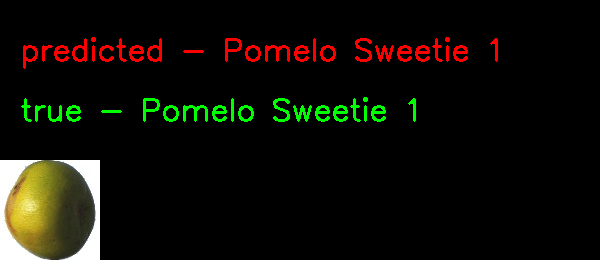

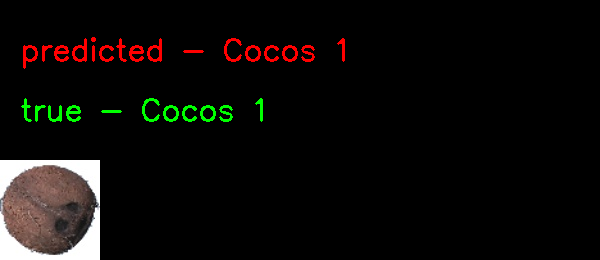

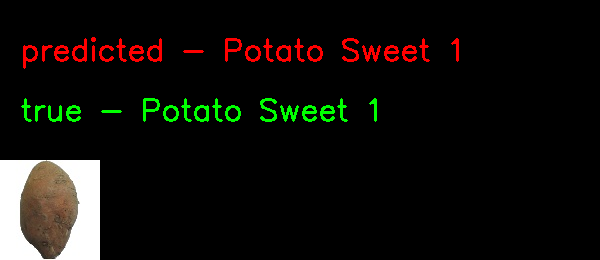

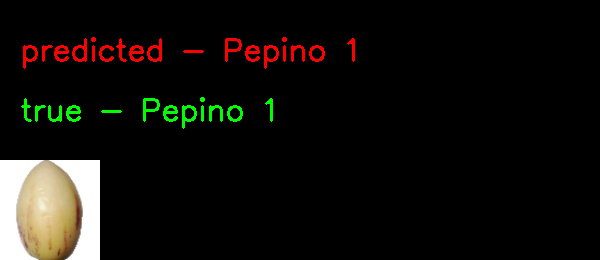

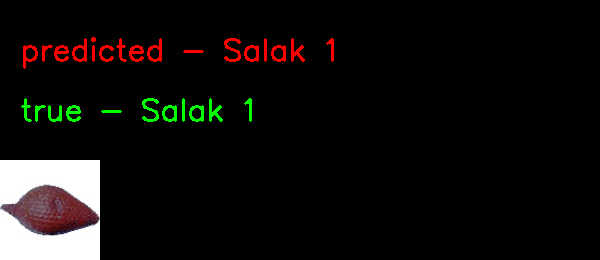

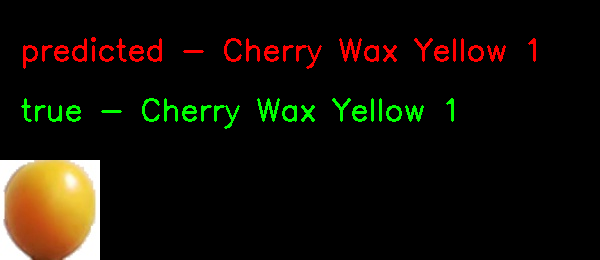

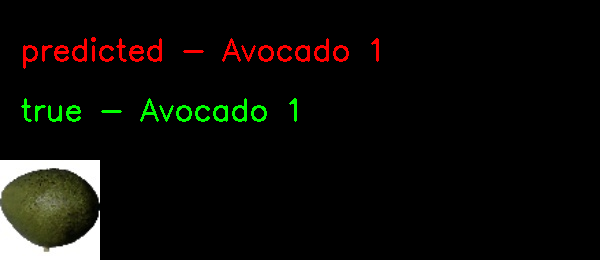

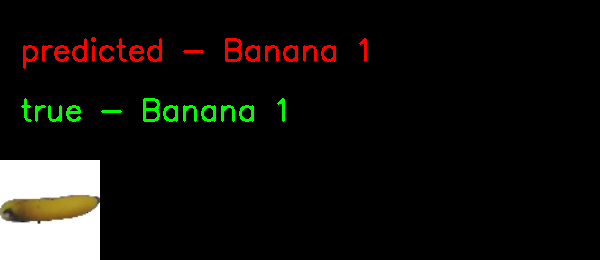

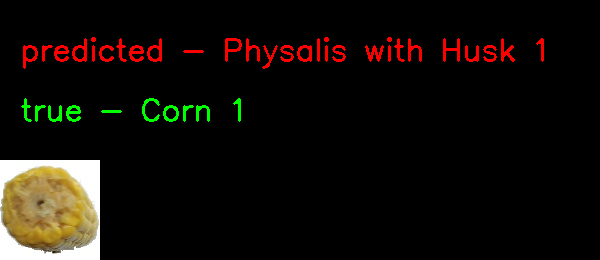

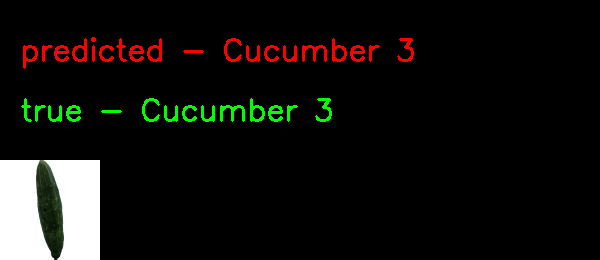

In [12]:
# Importation des bibliothèques nécessaires pour la gestion des fichiers, des images et du modèle
import os  # Pour manipuler les chemins de fichiers et répertoires
import numpy as np  # Pour les opérations sur des tableaux et des calculs numériques
from os import listdir  # Pour lister les fichiers dans un répertoire
from os.path import isfile, join  # Pour vérifier si un fichier existe et pour joindre des chemins
import cv2  # Pour la gestion des images avec OpenCV
from keras.models import load_model  # Pour charger le modèle Keras
from keras.preprocessing import image  # Pour pré-traiter les images avant de les passer au modèle
from google.colab.patches import cv2_imshow  # Import de la fonction cv2_imshow pour afficher les images dans Google Colab

# Fonction pour afficher la prédiction sur l'image
def draw_test(name, pred, im, true_label):
    # Définit une couleur noire pour le fond de l'image agrandie
    BLACK = [0, 0, 0]
    # Agrandit l'image avec des bordures en bas et à droite
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 500, cv2.BORDER_CONSTANT, value=BLACK)
    # Ajoute le texte pour la prédiction sur l'image
    cv2.putText(expanded_image, "predicted - " + pred, (20, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    # Ajoute le texte pour la vérité de terrain sur l'image
    cv2.putText(expanded_image, "true - " + true_label, (20, 120), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    # Affiche l'image dans Google Colab
    cv2_imshow(expanded_image)  # Utilise cv2_imshow au lieu de cv2.imshow dans Colab

# Fonction pour récupérer une image aléatoire
def getRandomImage(path, img_width, img_height):
    """Charge une image aléatoire depuis un répertoire aléatoire dans le chemin de test."""
    # Filtre les sous-dossiers dans le répertoire spécifié (les classes)
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    # Sélectionne un répertoire aléatoire parmi les classes
    random_directory = np.random.randint(0, len(folders))
    path_class = folders[random_directory]
    file_path = os.path.join(path, path_class)
    # Récupère les fichiers dans le répertoire de la classe
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    # Sélectionne un fichier aléatoire parmi les fichiers
    random_file_index = np.random.randint(0, len(file_names))
    image_name = file_names[random_file_index]
    final_path = os.path.join(file_path, image_name)
    # Charge et redimensionne l'image
    return image.load_img(final_path, target_size=(img_width, img_height)), final_path, path_class

# Dimensions des images que nous allons traiter
img_width, img_height = 32, 32

# Listes pour stocker les chemins des fichiers, les prédictions et les étiquettes réelles
files = []
predictions = []
true_labels = []

# Chargement du modèle pré-entrainé
model = load_model('/content/fruits_cnn.keras')  # Remplacer par le chemin correct de votre modèle

# Cartographie des étiquettes de classes (associant un indice numérique à un nom de classe)
class_labels = validation_generator.class_indices  # Récupère les indices des classes à partir du générateur de validation
class_labels = {v: k for k, v in class_labels.items()}  # Inverse les indices pour associer un index à l'étiquette de classe

# Prédiction sur 10 images aléatoires
for i in range(10):
    # Définition du chemin vers les données de test
    path = '/content/fruits-360_dataset_100x100/fruits-360/Test'
    # Récupère une image aléatoire et ses informations
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)  # Ajoute le chemin de l'image à la liste
    true_labels.append(true_label)  # Ajoute l'étiquette réelle à la liste
    # Pré-traitement de l'image pour la passer au modèle
    x = image.img_to_array(img)  # Convertit l'image en tableau numpy
    x = x * 1.0 / 255  # Normalise l'image entre 0 et 1
    x = np.expand_dims(x, axis=0)  # Ajoute une dimension supplémentaire pour correspondre au format d'entrée du modèle
    images = np.vstack([x])  # Empile les images (pour traitement par lots)
    classes = np.argmax(model.predict(images), axis=1)  # Prédiction de la classe avec la probabilité la plus élevée
    predictions.append(classes)  # Ajoute la prédiction à la liste

# Affichage des résultats
for i in range(len(files)):
    # Charge l'image à partir de son chemin
    im = cv2.imread(files[i])
    # Affiche l'image avec les informations de prédiction et de vérité terrain
    draw_test("Prediction", class_labels[predictions[i][0]], im, true_labels[i])
    # Attend qu'une touche soit pressée avant de fermer la fenêtre (utile pour la visualisation avec cv2)
    cv2.waitKey(0)

# Ferme toutes les fenêtres d'OpenCV après l'affichage
cv2.destroyAllWindows()
